In [1]:
%pip install pandas

In [2]:
%pip install pandas openpyxl

In [3]:
import pandas as pd

df_2022 = pd.read_excel('bomberos/ActuacionesBomberos_2022.xlsx')
df_2023 = pd.read_excel('bomberos/ActuacionesBomberos_2023.xlsx')
df_2024 = pd.read_excel('bomberos/ActuacionesBomberos_2024.xlsx')

# Combinar los DataFrames utilizando pd.concat()
df = pd.concat([df, df1, df2], ignore_index=True)

<class 'NameError'>: name 'df' is not defined

In [4]:
import pandas as pd

df_2022 = pd.read_excel('bomberos/ActuacionesBomberos_2022.xlsx')
df_2023 = pd.read_excel('bomberos/ActuacionesBomberos_2023.xlsx')
df_2024 = pd.read_excel('bomberos/ActuacionesBomberos_2024.xlsx')

# Combinar los DataFrames utilizando pd.concat()
df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

In [5]:
# Agrupar por 'Departamento' y sumar los salarios
df_agrupado = df.groupby(['AÑO', 'MES'])['TOTAL'].sum().reset_index()
print("\nDataFrame con la suma de accidentes x año, mes:")
print(df_suma_salarios)


DataFrame con la suma de accidentes x año, mes:


<class 'NameError'>: name 'df_suma_salarios' is not defined

In [6]:
print(df_agrupado)

     AÑO         MES  TOTAL
0   2022       abril   1860
1   2022      agosto   2415
2   2022   diciembre   2317
3   2022       enero    737
4   2022     febrero   1591
5   2022       julio   2892
6   2022       junio   2731
7   2022       marzo   1704
8   2022        mayo   2319
9   2022   noviembre   2100
10  2022     octubre   2341
11  2022  septiembre   2374
12  2023       abril   2124
13  2023      agosto   2619
14  2023   diciembre   2393
15  2023       enero   2185
16  2023     febrero   1652
17  2023       julio   2651
18  2023       junio   2433
19  2023       marzo   1984
20  2023        mayo   2498
21  2023   noviembre   2724
22  2023     octubre   2898
23  2023  septiembre   2751
24  2024       abril   2135
25  2024       enero   2055
26  2024     febrero   3757
27  2024       marzo   2221
28  2024        mayo  11226


Mean Squared Error: 1131438.4267751873
R-squared: -7.3222558729111995
Intercepto: -2353079.038461539
Coeficiente: [1164.65384615]


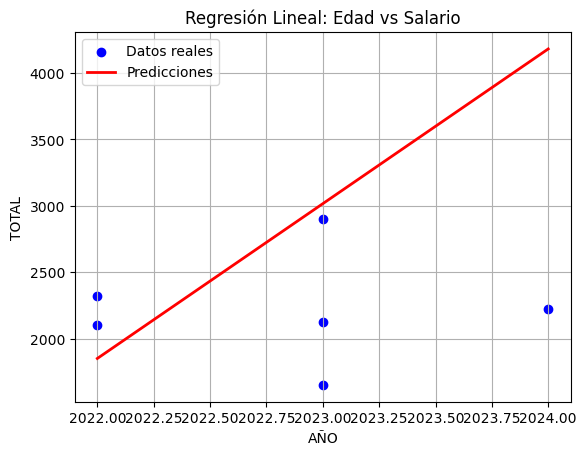

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Seleccionar las características (X) y el objetivo (y)
X = df_agrupado[['AÑO']]
y = df_agrupado['TOTAL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Mostrar los coeficientes del modelo
print("Intercepto:", modelo.intercept_)
print("Coeficiente:", modelo.coef_)

# Graficar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('AÑO')
plt.ylabel('TOTAL')
plt.title('Regresión Lineal: Edad vs Salario')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 1273243.1916246025
R-squared: -8.365295873274672
Intercepto: 3982726930.081763
Coeficientes: [ 0.00000000e+00 -3.93879238e+06  9.73836111e+02]


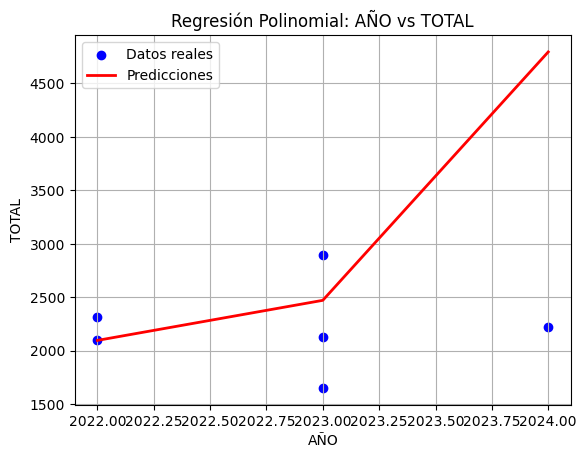

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las características (X) y el objetivo (y)
X = df_agrupado[['AÑO']]
y = df_agrupado['TOTAL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear características polinomiales de grado 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Crear el modelo de regresión lineal
modelo_poly = LinearRegression()

# Entrenar el modelo
modelo_poly.fit(X_train_poly, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_poly.predict(X_test_poly)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Mostrar los coeficientes del modelo
print("Intercepto:", modelo_poly.intercept_)
print("Coeficientes:", modelo_poly.coef_)

# Graficar los resultados
plt.scatter(X_test['AÑO'], y_test, color='blue', label='Datos reales')
plt.plot(X_test['AÑO'], y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('AÑO')
plt.ylabel('TOTAL')
plt.title('Regresión Polinomial: AÑO vs TOTAL')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
r2_score = modelo_poly.score(X, y)
print(f"Coeficiente de determinación R^2: {r2_score}")

r2_score = modelo_poly.score(X, y)
print(f"Coeficiente de determinación R^2: {r2_score}")